# Monarch butterfly population decline in North America: identifying the threatening processes

We will here repeat a Partial least squares (PLS) analysis to investigate the decline in the population of the [monarch butterfly](https://en.wikipedia.org/wiki/Monarch_butterfly) in North America. The original study can be found in [Thogmartin et al. (2017). Monarch butterfly population decline in North America: identifying the threatening processes. *Royal Society Open Science*, 4, 170760](https://doi.org/10.1098/rsos.170760).
In this article, the authors investigate factors that may have influenced the decline in the monarch butterfly population in North America over the last two decades.
The factors include climatic factors, habitat loss, disease, and agricultural
insecticide use. So let us see what PLS can tell us about these factors.

| <a href="https://commons.wikimedia.org/wiki/File:Danaus_plexippus_on_Asclepias_incarnata_4999.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Danaus_plexippus_on_Asclepias_incarnata_4999.jpg" width="50%"> </a>          |
|:-:|
|  *R. A. Nonenmacher, CC BY-SA 4.0 https://creativecommons.org/licenses/by-sa/4.0, via Wikimedia Commons*    |

## Loading the raw data
The raw data is available via [ScienceBase](http://dx.doi.org/10.5066/F7P55M8G). For convenience, it is also included here in the file [butterfly.csv](./butterfly.csv).

The population size of the monarch butterfly is based on the size (area) of their overwintering habitat in central Mexico. The data set contains many variables; a description is in the file [butterfly_variables.csv](./butterfly_variables.csv).

We start by loading the data:

In [4]:
# Import libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Markdown, display
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme(style="ticks", context="notebook", palette="muted")

In [5]:
# Load the raw data and take a peak at it:
data = pd.read_csv("butterfly.csv")
data

,year,area_pva,apva_1yr,popgrowth_pva,Prop_Inf,closum_N,closum_S,dinsum_N,dinsum_S,imisum_N,...,OWmean_gust,OWmean_max_temp,OWmean_min_temp,OWmean_max_humid,OWmean_min_humid,OWmean_max_wind,OWmean_min_wind,OWmean_max_gust,milkweed resource,log milkweed resource
0,1993,1.918,1.532,0.196,0.010,0.000,0.000,0.000,0.000,0.000,...,6.89,20.91,4.96,79.71,27.88,7.81,2.42,12.28,1119641971,9.049079
1,1994,2.114,1.918,0.353,0.010,0.000,0.000,0.000,0.000,0.000,...,8.39,21.53,6.93,86.35,32.12,8.32,2.39,17.39,1119641971,9.049079
2,1995,2.467,2.114,0.154,0.010,0.000,0.000,0.000,0.000,6.280,...,11.39,17.14,5.71,89.88,42.00,12.74,3.39,22.47,1119641971,9.049079
3,1996,2.621,2.467,-0.688,0.010,0.000,0.000,0.000,0.000,14.500,...,7.32,18.71,7.32,83.18,36.88,8.43,2.19,13.83,1119641971,9.049079
4,1997,1.934,2.621,-0.120,0.010,0.000,0.000,0.000,0.000,11.870,...,12.57,21.15,3.45,81.65,23.71,13.39,3.37,27.32,1101617054,9.042031
5,1998,1.814,1.934,0.136,0.008,0.000,0.000,0.000,0.000,11.820,...,7.36,21.18,6.14,77.76,28.59,9.05,2.30,13.62,1030959380,9.013242
6,1999,1.950,1.814,-0.316,0.015,0.000,0.000,0.000,0.000,13.580,...,9.70,19.20,3.69,80.12,29.12,11.35,3.76,17.87,880458535,8.944709
7,2000,1.634,1.950,0.315,0.026,0.000,0.000,0.000,0.000,16.710,...,10.36,19.05,4.23,76.88,26.76,11.29,2.46,19.91,702028555,8.846355
8,2001,1.949,1.634,-0.289,0.020,0.000,0.000,0.000,0.000,14.340,...,8.94,19.43,7.72,89.00,38.24,9.72,2.71,17.34,579073534,8.762734
9,2002,1.660,1.949,0.057,0.033,0.000,0.000,0.000,0.000,17.250,...,8.95,19.88,6.90,86.24,35.00,10.52,2.61,18.38,487615199,8.688077


The variable names are a bit cryptic, so let us load [butterfly_variables.csv](./butterfly_variables.csv) to get
a description:

In [6]:
variable_info = pd.read_csv("butterfly_variables.csv")
display(Markdown(variable_info.to_markdown(index=False)))

| Variable              | Description                                                                                                                                                                                  | type          |
|:----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------|
| year                  | Year                                                                                                                                                                                         | other         |
| area_pva              | Area (in ha) occupied by the eastern migratory population of Monarch Butterflies overwintering  in Mexico, following methods of Semmens et al. (2016)                                        | other         |
| apva_1yr              | Lagged by 1 year, Area (in ha) occupied by the eastern migratory population of Monarch Butterflies overwintering  in Mexico                                                                  | Abundance     |
| popgrowth_pva         | Year-to-year population rate of change; not used in analysis                                                                                                                                 | other         |
| Prop_Inf              | Proportion of Monarch Butterflies infected with Ophryocystis elektroscirrha, as provided by S. Altizer and Monarch Health                                                                    | Disease       |
| closum_N              | Clothianidin (kg), summed across the North region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                       | Pesticide     |
| closum_S              | Clothianidin (kg), summed across the South region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                       | Pesticide     |
| dinsum_N              | Dinotefuran (kg), summed across the North region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                        | Pesticide     |
| dinsum_S              | Dinotefuran (kg), summed across the South region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                        | Pesticide     |
| imisum_N              | Imidicloprid (kg), summed across the North region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                       | Pesticide     |
| imisum_S              | Imidcloprid (kg), summed across the South region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                        | Pesticide     |
| thisum_N              | Thiamethoxam (kg), summed across the North region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                       | Pesticide     |
| thisum_S              | Thiamethoxam (kg), summed across the South region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                       | Pesticide     |
| totalneon_N           | All four major neonicotinoids (kg), summed across the North region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder      | Pesticide     |
| totalneon_S           | All four major neonicotinoids (kg), summed across the South region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder      | Pesticide     |
| glysum_N              | Glyphosate (kg), summed across the North region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                         | Habitat       |
| glysum_S              | Glyphosate (kg), summed across the South region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                         | Habitat       |
| glycum_N              | Glyphosate (kg), cumulative across the North region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                     | Habitat       |
| glycum_S              | Glyphosate (kg), cumulative across the South region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                     | Habitat       |
| DC_N                  | Dicamba (kg), summed across the North region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                            | Habitat       |
| twoD_N                | 2,4-D (kg), summed across the North region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                              | Habitat       |
| DC_S                  | Dicamba (kg), summed across the South region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                            | Habitat       |
| twoD_S                | 2,4-D (kg), summed across the South region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder                              | Habitat       |
| CRPsum_N              | Land (hectares) enrolled Conservation Reserve Program, summed across the North region, annually, as provided by U.S. Department of Agriculture, 2016 Conservation Reserve Program Statistics | Habitat       |
| CRPsum_S              | Land (hectares) enrolled Conservation Reserve Program, summed across the South region, annually, as provided by U.S. Department of Agriculture, 2016 Conservation Reserve Program Statistics | Habitat       |
| T70p1sum_NC           | Sum of the number of days >21.1 degrees C (70 degrees F) across North Central region, for Period 1, as provided by PRISM and summarized by region by A. Allstadt                             | Temperature   |
| T70p1sum_NE           | Sum of the number of days >21.1 degrees C (70 degrees F) across Northeastern region, for Period 1, as provided by PRISM and summarized by region by A. Allstadt                              | Temperature   |
| T70p2sum_NC           | Sum of the number of days >21.1 degrees C (70 degrees F) across North Central region, for Period 2, as provided by PRISM and summarized by region by A. Allstadt                             | Temperature   |
| T70p2sum_NE           | Sum of the number of days >21.1 degrees C (70 degrees F) across Northeastern region, for Period 2, as provided by PRISM and summarized by region by A. Allstadt                              | Temperature   |
| T70p3sum_NC           | Sum of the number of days >21.1 degrees C (70 degrees F) across North Central region, for Period 3, as provided by PRISM and summarized by region by A. Allstadt                             | Temperature   |
| T70p3sum_NE           | Sum of the number of days >21.1 degrees C (70 degrees F) across Northeastern region, for Period 3, as provided by PRISM and summarized by region by A. Allstadt                              | Temperature   |
| T70p4sum_NC           | Sum of the number of days >21.1 degrees C (70 degrees F) across North Central region, for Period 4, as provided by PRISM and summarized by region by A. Allstadt                             | Temperature   |
| T70p4sum_NE           | Sum of the number of days >21.1 degrees C (70 degrees F) across Northeastern region, for Period 4, as provided by PRISM and summarized by region by A. Allstadt                              | Temperature   |
| GDD_Ssp               | Growing Degree Days, South, spring, as provided by PRISM and summarized by region by A. Allstadt                                                                                             | Temperature   |
| GDD_NC                | Growing Degree Days, North Central, as provided by PRISM and summarized by region by A. Allstadt                                                                                             | Temperature   |
| GDD_NE                | Growing Degree Days, Northeastern, as provided by PRISM and summarized by region by A. Allstadt                                                                                              | Temperature   |
| GDD_Sf                | Growing Degree Days, South, fall, as provided by PRISM and summarized by region by A. Allstadt                                                                                               | Temperature   |
| LDD_Ssp               | Lethal Degree Days, South, spring, as provided by PRISM and summarized by region by A. Allstadt                                                                                              | Temperature   |
| LDD_NC                | Lethal Degree Days, North Central, as provided by PRISM and summarized by region by A. Allstadt                                                                                              | Temperature   |
| LDD_NE                | Lethal Degree Days, Northeast, as provided by PRISM and summarized by region by A. Allstadt                                                                                                  | Temperature   |
| LDD_Sf                | Lethal Degree Days, South, fall, as provided by PRISM and summarized by region by A. Allstadt                                                                                                | Temperature   |
| Tempp1avg_NC          | Average temperature (degrees C), North Central, Period 1, as provided by PRISM and summarized by region by A. Allstadt                                                                       | Temperature   |
| Tempp1avg_NE          | Average temperature (degrees C), Northeastern, Period 1, as provided by PRISM and summarized by region by A. Allstadt                                                                        | Temperature   |
| Tempp2avg_NC          | Average temperature (degrees C), North Central, Period 2, as provided by PRISM and summarized by region by A. Allstadt                                                                       | Temperature   |
| Tempp2avg_NE          | Average temperature (degrees C), Northeastern, Period 2, as provided by PRISM and summarized by region by A. Allstadt                                                                        | Temperature   |
| Tempp3avg_NC          | Average temperature (degrees C), North Central, Period 3, as provided by PRISM and summarized by region by A. Allstadt                                                                       | Temperature   |
| Tempp3avg_NE          | Average temperature (degrees C), Northeastern, Period 3, as provided by PRISM and summarized by region by A. Allstadt                                                                        | Temperature   |
| Tempp4avg_NC          | Average temperature (degrees C), North Central, Period 4, as provided by PRISM and summarized by region by A. Allstadt                                                                       | Temperature   |
| Tempp4avg_NE          | Average temperature (degrees C), Northeastern, Period 4,  as provided by PRISM and summarized by region by A. Allstadt                                                                       | Temperature   |
| MeanJ_NC              | Mean June Temperature, North Central,  as provided by PRISM and summarized by region by A. Allstadt                                                                                          | Temperature   |
| MeanJ_NE              | Mean June Temperature, Northeastern,  as provided by PRISM and summarized by region by A. Allstadt                                                                                           | Temperature   |
| MeantempSp_S          | Mean Temperature, South, spring,  as provided by PRISM and summarized by region by A. Allstadt                                                                                               | Temperature   |
| TminAug_NC            | Percentage of days that below the 10th percentile for minimum temperatures, North Central, August,  as provided by PRISM and summarized by region by A. Allstadt                             | Temperature   |
| TminAug_NE            | Percentage of days that below the 10th percentile for minimum temperatures, Northeastern, August,  as provided by PRISM and summarized by region by A. Allstadt                              | Temperature   |
| TminJl_NC             | Percentage of days that below the 10th percentile for minimum temperatures, North Central, July,  as provided by PRISM and summarized by region by A. Allstadt                               | Temperature   |
| TminJl_NE             | Percentage of days that below the 10th percentile for minimum temperatures, Northeastern, July,  as provided by PRISM and summarized by region by A. Allstadt                                | Temperature   |
| TminJu_NC             | Percentage of days that below the 10th percentile for minimum temperatures, North Central, June,  as provided by PRISM and summarized by region by A. Allstadt                               | Temperature   |
| TminJu_NE             | Percentage of days that below the 10th percentile for minimum temperatures, Northeastern, June,  as provided by PRISM and summarized by region by A. Allstadt                                | Temperature   |
| NighttempF_S          | Nighttime Temperature, South, fall,  as provided by PRISM and summarized by region by A. Allstadt                                                                                            | Temperature   |
| DroughtSp_S           | Standardized precipitation index (March 1st - May 31st), South, spring,  as provided by PRISM and summarized by region by A. Allstadt                                                        | Precipitation |
| Drought_NC            | Standardized precipitation index (June 1st - August 30th), North Central,  as provided by PRISM and summarized by region by A. Allstadt                                                      | Precipitation |
| Drought_NE            | Standardized precipitation index (June 1st - August 30th), Northeastern,  as provided by PRISM and summarized by region by A. Allstadt                                                       | Precipitation |
| Prec_S                | Precipitation (mm), South,  as provided by PRISM and summarized by region by A. Allstadt                                                                                                     | Precipitation |
| Ramirez.cumul         | Cumulative Overwinter Forest Loss (ha), Ramirez et al. study                                                                                                                                 | Habitat       |
| Vidal.cumul           | Cumulative Overwinter Forest Loss (ha), Vidal et al. study                                                                                                                                   | Habitat       |
| Ramirez.annu          | Sum Overwinter Forest Loss (ha), Ramirez et al. study                                                                                                                                        | Habitat       |
| Vidal.annu            | Sum Overwinter Forest Loss (ha), Vidal et al. study                                                                                                                                          | Habitat       |
| OWmean_temp           | Overwinter Mean Temperature (degrees F), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                                  | Temperature   |
| OWmean_humid          | Overwinter Mean Relative Humidity (%), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                                    | Precipitation |
| OWtotal_precip        | Overwinter Total Precipitation (in), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                                      | Precipitation |
| OWmean_wind           | Overwinter Mean Wind (mph), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                                               | Temperature   |
| OWmean_gust           | Overwinter Mean Gust (mph), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                                               | Temperature   |
| OWmean_max_temp       | Overwinter Mean Maximum Temperature (degrees F), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                          | Temperature   |
| OWmean_min_temp       | Overwinter Mean Minimum Temperature (degrees F), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                          | Temperature   |
| OWmean_max_humid      | Overwinter Mean Maximum Relative Humidity (%), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                            | Precipitation |
| OWmean_min_humid      | Overwinter Mean Minimum Relative Humidity (%), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                            | Precipitation |
| OWmean_max_wind       | Overwinter Mean Maximum Wind (mph), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                                       | Temperature   |
| OWmean_min_wind       | Overwinter Mean Minimum Wind (mph), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                                       | Temperature   |
| OWmean_max_gust       | Overwinter Mean Maximum Gust (mph), as provided by Meteoblue for the Adolfo López Mateos International Airport, Mexico                                                                       | Temperature   |
| milkweed resource     | Milkweed Resource (units of equivalent stems), Pleasants (2016)                                                                                                                              | other         |
| log milkweed resource | Log(Milkweed Resource), Pleasants (2016)                                                                                                                                                     | other         |

We see here that `area_pva` contains the area, which we can use as a proxy for the population size. In addition, we see that the variables have a type; for instance, `closum_N` is the pesticide [Clothianidin](https://en.wikipedia.org/wiki/Clothianidin) and `closum_N` quantifies the amount of this chemical used in a particular region.

Let us pick out the variables we will use:

- `area_pva`: As the y-variable (the one we will predict).


- `popgrowth_pva`: We will skip this variable (as per the description: "not used in analysis")


- `milkweed resource` (and `log milkweed resource`): We will also skip these two. These variables quantify
   the amount of [milkweed](https://en.wikipedia.org/wiki/Asclepias), a plant that monarch butterflies
   use as a host for their larvae. This is probably described by
   variables that quantify habitat loss. On a side note - we could include this variable as an
   additional y-variable (to see what influences the amount of milkweed).


- `year`: We will skip this variable as we are not interested in seeing the influence of the year
  (but rather the influence of factors such as habitat loss). (And we know already that the butterfly population
  is decreasing.)


- All other variables: These will be our X-variables. We had 81 columns in the original data set,
  we are skipping 4 of these, and one is the y-variable - we should then be left with 81 - 4 - 1 = 76 factors.

In [7]:
yvars = ["area_pva"]
skip = ["year", "popgrowth_pva", "milkweed resource", "log milkweed resource"]
xvars = [i for i in data.columns if i not in skip + yvars]
print(f"No. of X-variables: {len(xvars)}")

y = data[yvars].to_numpy()
X = data[xvars].to_numpy()

No. of X-variables: 76


For convenience, we also make a small "table" so that we can look up the type and description for a variable:

In [8]:
variable_type = {
    namei: typei
    for namei, typei in zip(
        variable_info["Variable"].values, variable_info["type"].values
    )
}
description = {
    namei: desci
    for namei, desci in zip(
        variable_info["Variable"].values, variable_info["Description"].values
    )
}

test_var = "CRPsum_N"
print(f"\nInfo for: {test_var}")
print(f"Type: {variable_type[test_var]}")
print(f"Description: {description[test_var]}")

test_var = "glysum_N"
print(f"\nInfo for: {test_var}")
print(f"Type: {variable_type[test_var]}")
print(f"Description: {description[test_var]}")


Info for: CRPsum_N
Type: Habitat
Description: Land (hectares) enrolled Conservation Reserve Program, summed across the North region, annually, as provided by U.S. Department of Agriculture, 2016 Conservation Reserve Program Statistics

Info for: glysum_N
Type: Habitat
Description: Glyphosate (kg), summed across the North region, annually, as provided by the USGS 2016 Pesticide National Synthesis Project and summarized by region by J. Rohweder


## Preparing the data for partial least squares

The variables we have are in very different units (for instance, some are measured in kg, while others are
measured in Celsius or Fahrenheit) and we will therefore scale the raw data before using it: 

In [9]:
from sklearn.preprocessing import StandardScaler

scaler_x, scaler_y = StandardScaler(), StandardScaler()

y = scaler_y.fit_transform(data[yvars].to_numpy())
X = scaler_x.fit_transform(data[xvars].to_numpy())

## Creating a PLS model

Next, we create the partial least squares model. Here, we have few observations - we will, therefore, not
split into test/training sets, but we will instead do [Leave-one-out cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Leave-one-out_cross-validation). 

In [10]:
from sklearn.cross_decomposition import PLSRegression

In [11]:
# Create the PLS model here:
# model = PLSRegression(...)
model = PLSRegression(scale=False, n_components=2)
model.fit(X, y)

PLSRegression(scale=False)

### Plot predicted y vs. measured y

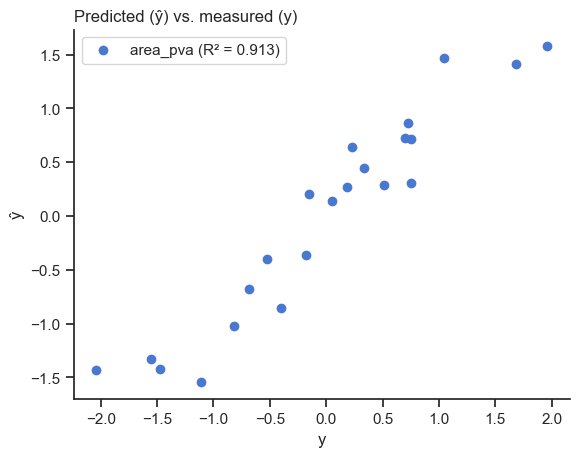

In [12]:
from sklearn.metrics import r2_score

fig, ax = plt.subplots()
y_hat = model.predict(X)
for i, yvari in enumerate(yvars):
    ax.scatter(
        y[:, i],
        y_hat[:, i],
        label=f"{yvari} (R² = {r2_score(y[:, i], y_hat[:, i]):.3g})",
    )
ax.legend()
ax.set(xlabel="y", ylabel="ŷ")
ax.set_title("Predicted (ŷ) vs. measured (y)", loc="left")
sns.despine(fig=fig)

### Leave-one-out-cross-validation

In [13]:
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
Q = []  # Calculated as R², but with one point left out from the fitting.
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_loo = PLSRegression(**model.get_params())
    model_loo.fit(X_train, y_train)
    y_hat = model_loo.predict(X)
    Q.append(r2_score(y_hat, y))
print(f"Q² = {np.mean(Q)} +- {np.std(Q)}")

Q² = 0.8966419525336963 +- 0.018296274389884005


*How would you "rate" the R² and Q² here?*

## Inspecting the PLS model

Next, we will inspect the results from the PLS model. We will focus on the [regression coefficients](#Regression-coefficients) and the [loadings](#Inspecting-loadings).

To simplify the plotting, the file [fancyplots.py](./fancyplots.py) contains some methods that can be used
to plot the regression coefficients and the loadings.

### Inspecting regression coefficients

The PLS model can be summarized as,

\begin{equation}
\mathbf{Y} = \mathbf{X} \mathbf{B}_\text{PLS}
\end{equation}

where $\mathbf{B}_\text{PLS}$ contains the PLS regression coefficients. These coefficients
give the contributions from the original X-variables for predicting the Y-variables.

Here, we will plot these coefficients in a bar chart to compare them. We will also colour the bars
according to the type of the variable:

[<Figure size 640x480 with 1 Axes>]

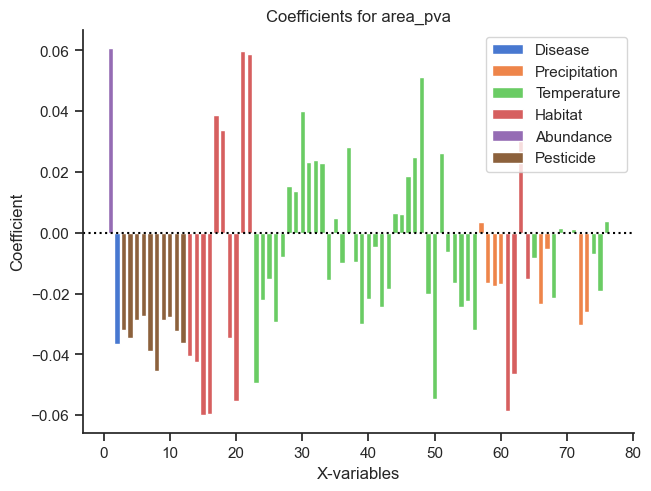

In [15]:
# Plot coefficients:
from fancyplots import mpl_plot_coefficients

mpl_plot_coefficients(model, xvars, yvars, variable_type=variable_type)

*How would you summarize the influence of pesticides on `area_pva`?*

The [bokeh](https://docs.bokeh.org/en/latest/) library makes it possible to create interactive
visualizations for web browsers. Here, we will use it to make a plot where the name, type, and description
of the variables are shown:

In [16]:
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [17]:
from fancyplots import bokeh_plot_coefficients

figures = bokeh_plot_coefficients(
    model, xvars, yvars, variable_type=variable_type, description=description
)
show(figures)

### Inspecting loadings

In the PLS model, we obtain loadings for both X and Y. We can plot these together for different latent
variables to see the contributions from the original variables to the latent variables, and correlations between
variables.

In terms of the original variables, we have for the X-scores ($\mathbf{T}$) and Y-scores ($\mathbf{U}$):


\begin{align}
\mathbf{T} &= \mathbf{X} \mathbf{R}_x \\
\mathbf{U} &= \mathbf{Y} \mathbf{R}_y
\end{align}


where $\mathbf{R}_x$ and $\mathbf{R}_y$ are *weights/loadings* that can be applied
directly to the original data matrices (in `sklearn`, they are called *rotations*).
For instance, the $\mathbf{R}_x$
matrix gives us information on the contributions from the original variables to the scores. We can plot them similarly to how we plot the loadings in PCA (e.g., we can plot them and look for correlations
between the X-variables). We can do the same for the Y-rotation $\mathbf{R}_y$ and look for correlations between
the Y-variables. But, if we here are using just one Y-variable, then this is not too interesting (as
there are no other Y-variables to look for correlations with).

#### Digging deeper

If we are making a prediction where we want to *predict* $\mathbf{Y}_\text{new}$ from
new $\mathbf{X}_\text{new}$ values, then
the relation for the Y-scores does not seem too helpful, since we need to know the new $\mathbf{Y}_\text{new}$ we
are trying to predict to find the new Y-scores. If we follow the approach from when we did "PLS by hand",
then we could do the following to predict $\mathbf{Y}_\text{new}$:

1. Obtain $\mathbf{T}_\text{new}$ from $\mathbf{T}_\text{new} = \mathbf{X}_\text{new} \mathbf{R}_x$

2. Obtain $\mathbf{U}_\text{new}$ from $\mathbf{T}_\text{new}$

3. Obtain $\mathbf{Y}_\text{new}$ from $\mathbf{U}_\text{new} = \mathbf{Y}_\text{new} \mathbf{R}_y$
   by inverting $\mathbf{R}_y$.


In general, we can not invert $\mathbf{R}_y$, but we can use the *loadings* ($\mathbf{Q}$)
for this,

\begin{equation}
\mathbf{Y} = \mathbf{U} \mathbf{Q}^\top
\end{equation}


We can then write,


\begin{equation}
\mathbf{Y}_\text{new} = \mathbf{U}_\text{new} \mathbf{Q}^\top = \mathbf{T}_\text{new} \mathbf{Q}^\top
\end{equation}

(note: we "absorb" the $g$-factors relating $\mathbf{U}$ and $\mathbf{T}$ into $\mathbf{Q}$).
In this equation, we directly relate the X-scores and the predicted Y
via the loadings $\mathbf{Q}$.

Let us verify some of these relations before we move on (note: similar to the Y-loadings $\mathbf{Q}$, there is also a set of X-loadings, $\mathbf{P}$ we can use
for $\mathbf{X} = \mathbf{T} \mathbf{P}^\top$): 

In [18]:
# Let us first check the transformation from X, y to scores:
T, U = model.transform(X, y)  # Get the scores directly from the PLS model
Rx = model.x_rotations_
Ry = model.y_rotations_
T_by_hand = X @ Rx
U_by_hand = y @ Ry

print("X-scores are OK:", np.allclose(T, T_by_hand))
print("Y-scores are OK:", np.allclose(U, U_by_hand))

X-scores are OK: True
Y-scores are OK: True


In [19]:
# Let us check the predictions:
Y_new = model.predict(X)  # Predict Y from the B_PLS coefficients and X
Q = model.y_loadings_
Y_new_2 = T @ Q.T  # Predict Y from the X-scores and Y-loadings
print(
    "Prediction with (X, B_PLS) and (T, Q) are the same:",
    np.allclose(Y_new, Y_new_2),
)

Prediction with (X, B_PLS) and (T, Q) are the same: True


We have now two equations for predicting $\mathbf{Y}_\text{new}$:

\begin{align}
\mathbf{T}_\text{new} &= \mathbf{X}_\text{new} \mathbf{R}_x \\
\mathbf{Y}_\text{new} &= \mathbf{T}_\text{new} \mathbf{Q}^\top 
\end{align}

* In the first equation, the $\mathbf{R}_x$ matrix contain information on how the original variables are
  used to obtain the X-scores.
* In the second equation, the $\mathbf{Q}$ matrix contain information on how the original variables
  (via the scores $\mathbf{T}_\text{new}$) are used to predict new $\mathbf{Y}_\text{new}$ values. So,
  if we plot these loadings (together with $\mathbf{R}_x$),
  we will get information on how X-variables are correlated with
  the Y-variables. But that is not all; the $\mathbf{Q}$ matrix also contains information on
  how the Y-variables are correlated with each other.
  
**Summarized:** If we plot the values from $\mathbf{R}$ and $\mathbf{Q}$ for selected latent variables (for
instance, the first and second), we get information on:

* correlations between the X-variables,
* correlations between the Y-variables, and,
* correlations between the X and Y-variables.

The $\mathbf{R}_x$ matrix can be accessed via `.x_rotations_` of the sklearn object for the PLS model, and
the $\mathbf{Q}$ matrix can be accessed via `.y_loadings_` of the same object. We will now use these two to
create a biplot, showing the correlations between the variables.

[<Figure size 600x600 with 1 Axes>]

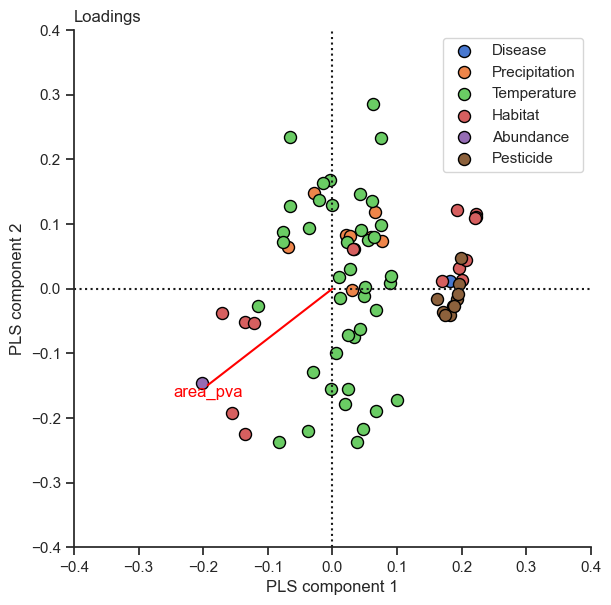

In [20]:
from fancyplots import mpl_plot_loadings

mpl_plot_loadings(model, xvars, yvars, variable_type, idx1=0, idx2=1)

### Interactive plot of loadings

In [21]:
from fancyplots import bokeh_plot_loadings

fig = bokeh_plot_loadings(
    model,
    xvars,
    yvars,
    variable_type,
    description,
    idx1=0,
    idx2=1,
)
show(fig)

From the previous plot(s):

- How is the area of land enrolled in Conservation Reserve Program (variables `CRPsum_N` and `CRPsum_S`)
  correlated with the population size?


- How is the (cumulative) use of the herbicide Glyphosate (variables `glycum_N` and `glycum_S`)
  correlated with the population size?


- Locate the variables describing the use of the herbicide dicamba in the northern region
  (`DC_N`) and in the southern region (`DC_S`). How are these correlated with the population size?


- Include the "year" as an additional Y-variable and rerun the analysis. But before that, where
  approximately would you expect the "year" to show up in the loadings plot above? (Hint: How is it correlated with the population size?)